In [10]:
import pickle
import numpy as np
import os
from scipy.stats import norm
import matplotlib.pyplot as plt

In [11]:
means = []
gts = []
stds = []
vars = []
fs = os.listdir('data')
for f in fs:
    if "new" not in f:
        continue
    with (open(f"data/{f}", "rb")) as openfile:
        measurements = pickle.load(openfile)
        measurements = np.array(measurements,dtype=np.float64)
        means.append(measurements.mean())
        stds.append(measurements.std())
        vars.append(measurements.var())
        gts.append(float(f.split('_')[2]))
biases = [abs(g-m) for (g,m) in zip(gts,means)]

In [12]:
measurements.mean(), measurements.var(), measurements.std(), measurements

(9.6595,
 0.0002387499999999958,
 0.015451537140362308,
 array([9.67, 9.67, 9.67, 9.67, 9.63, 9.66, 9.65, 9.67, 9.67, 9.68, 9.65,
        9.64, 9.67, 9.67, 9.65, 9.66, 9.66, 9.64, 9.65, 9.64, 9.67, 9.68,
        9.66, 9.67, 9.68, 9.69, 9.66, 9.68, 9.61, 9.65, 9.65, 9.64, 9.63,
        9.67, 9.64, 9.67, 9.66, 9.66, 9.67, 9.67, 9.67, 9.67, 9.66, 9.62,
        9.65, 9.67, 9.67, 9.66, 9.66, 9.66, 9.66, 9.66, 9.67, 9.68, 9.67,
        9.62, 9.64, 9.67, 9.66, 9.68, 9.66, 9.66, 9.67, 9.68, 9.64, 9.66,
        9.66, 9.64, 9.67, 9.66, 9.67, 9.65, 9.66, 9.65, 9.69, 9.65, 9.66,
        9.65, 9.62, 9.66, 9.65, 9.67, 9.67, 9.68, 9.67, 9.64, 9.65, 9.67,
        9.67, 9.67, 9.67, 9.64, 9.63, 9.66, 9.67, 9.65, 9.65, 9.67, 9.66,
        9.67]))

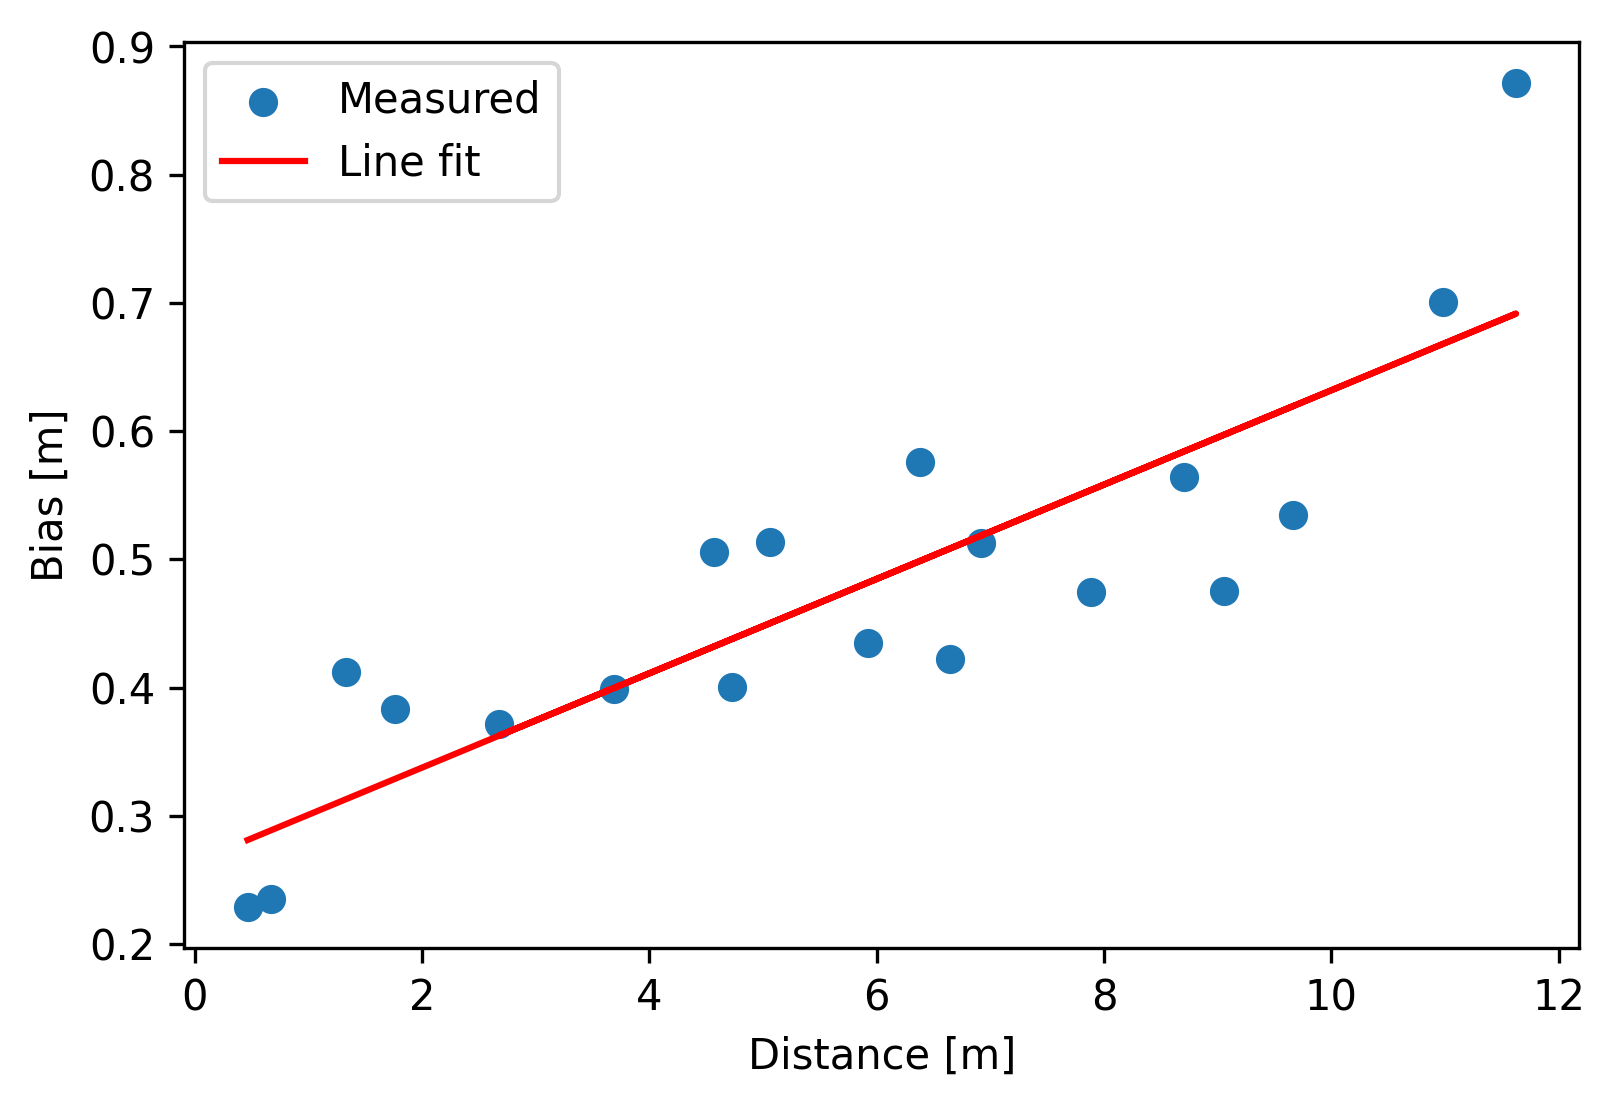

In [30]:
fig, axs = plt.subplots(1,1,dpi=300)
axs.scatter(means,biases)
coef = np.polyfit(means,biases,1)
poly1d_fn = np.poly1d(coef)
axs.plot(means,poly1d_fn(means),'r')
axs.legend(["Measured","Line fit"])
axs.set(xlabel='Distance [m]', ylabel='Bias [m]')
# axs.figure(figsize=(10,20),dpi=300)
fig.savefig("report/figures/distance_bias.png")

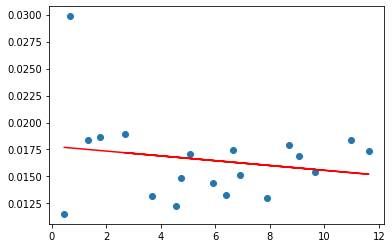

In [ ]:
plt.scatter(means,stds)
coef = np.polyfit(means,stds,1)
poly1d_fn = np.poly1d(coef)
plt.plot(means,poly1d_fn(means),'r')

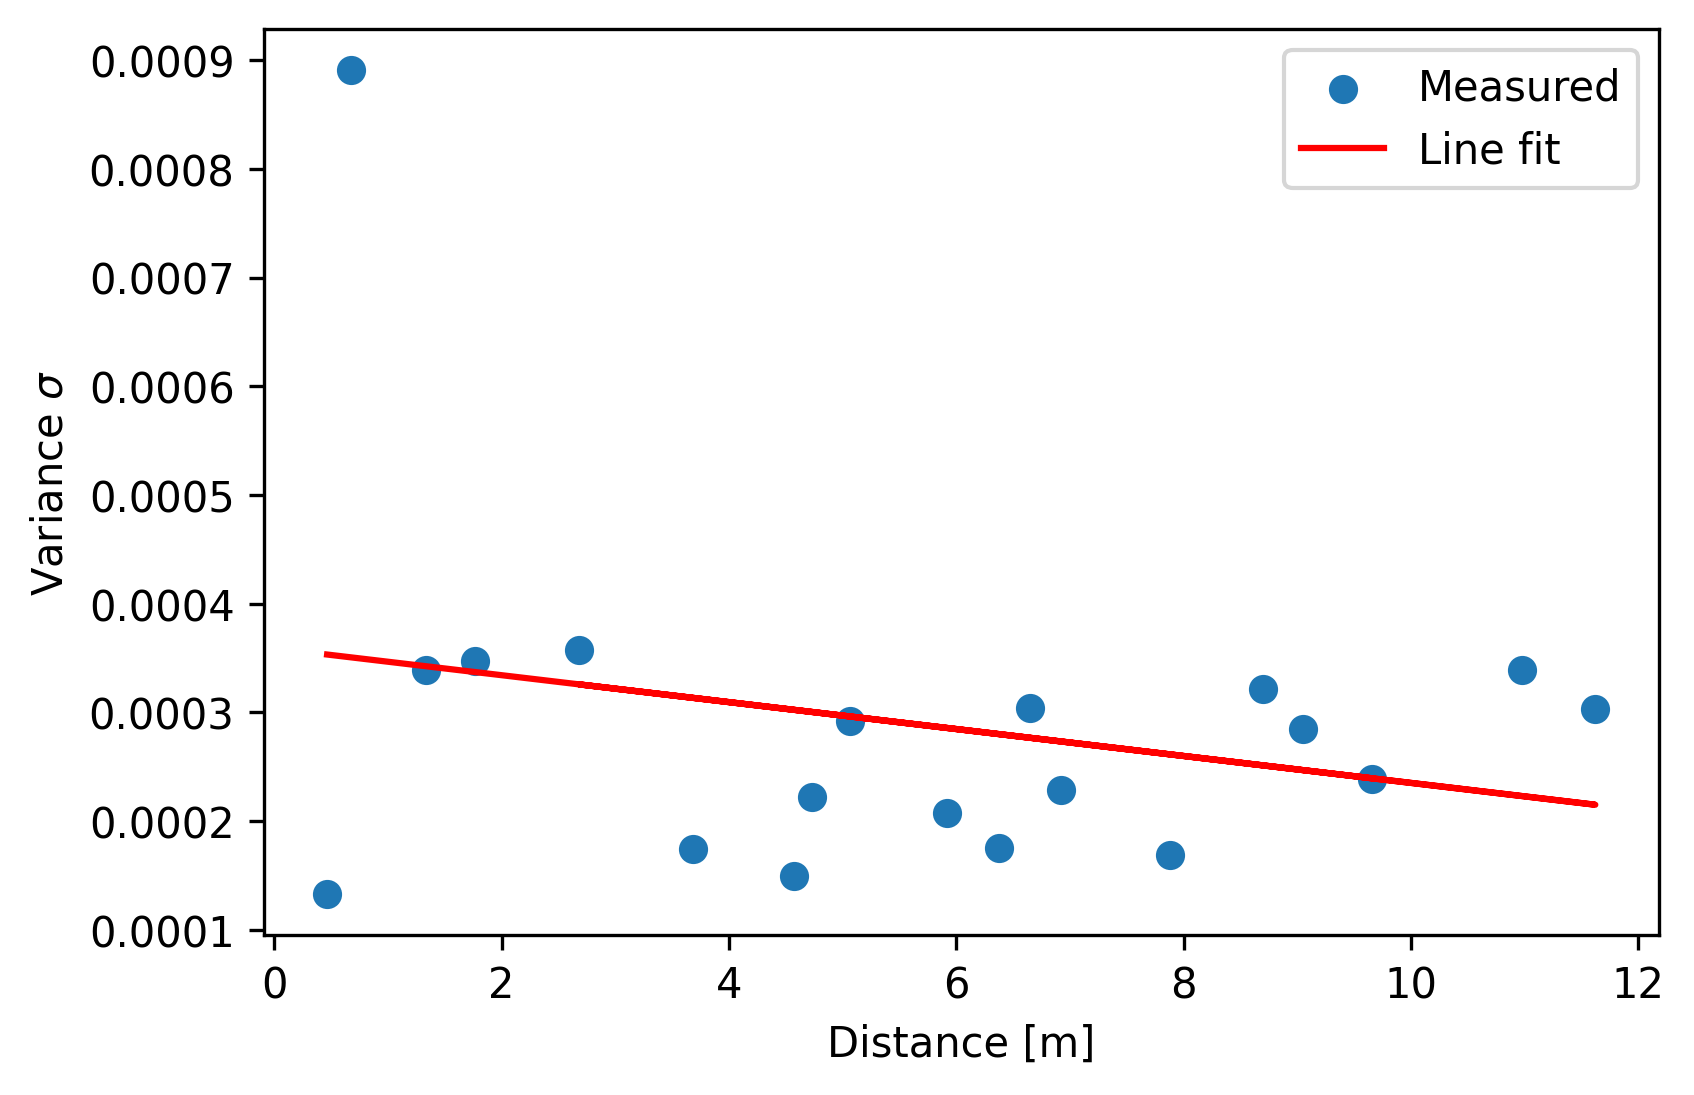

In [31]:
fig, axs = plt.subplots(1,1,dpi=300)
axs.scatter(means,vars)
coef = np.polyfit(means,vars,1)
poly1d_fn = np.poly1d(coef)
axs.plot(means,poly1d_fn(means),'r')
axs.legend(["Measured","Line fit"])
axs.set(xlabel='Distance [m]', ylabel='Variance $\sigma$')
fig.savefig("report/figures/dist_variance.png")

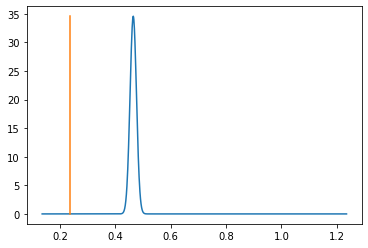

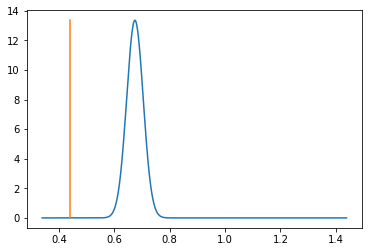

In [16]:
for i,(m,g,s) in enumerate(zip(means,gts,stds)):
    # Plot between around ground truth
    x_axis = np.arange(g-.1, g+1, 0.001)
    plt.figure(i)
    # Mean = 0, SD = 2.
    ys = norm.pdf(x_axis,m,s)
    plt.plot(x_axis, ys)
    plt.plot([g,g],[0,ys.max()])
    # print(f"bias: {abs(g-m)}; mean: {m};")
    if i == 1:
        break
plt.show()

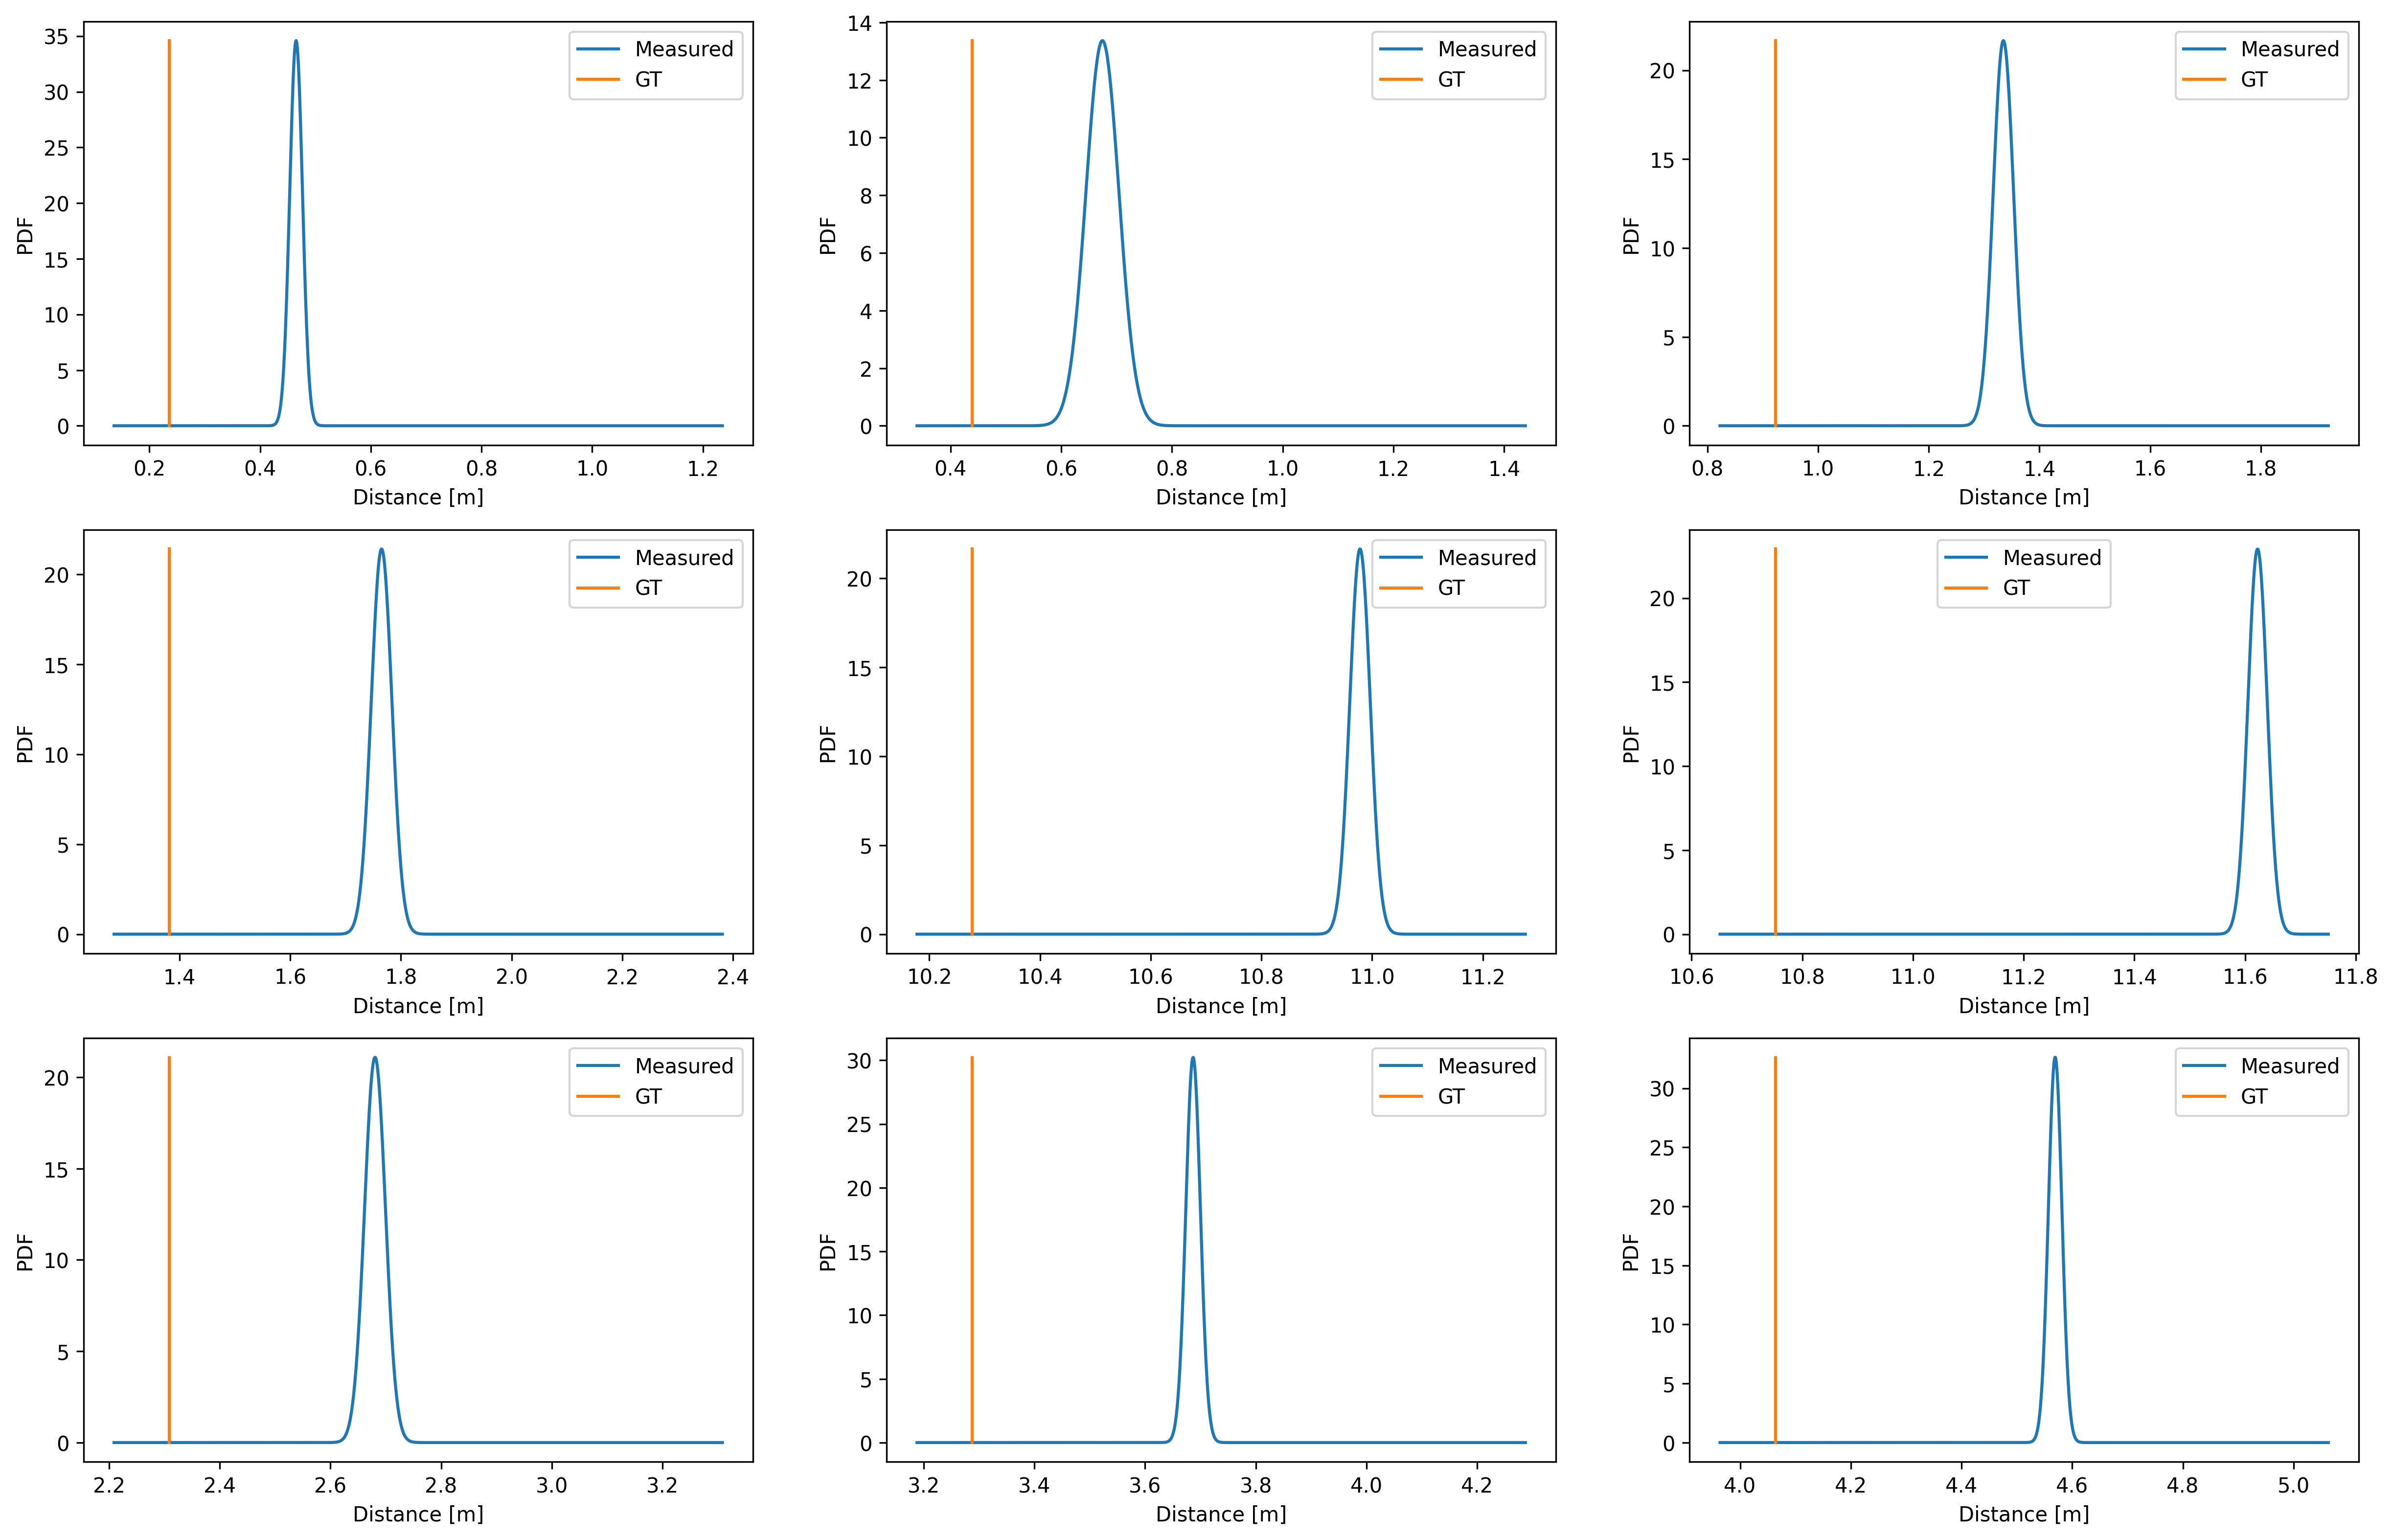

In [17]:
import math
fig, axs = plt.subplots(3,3, figsize=(20,13), dpi=300)

for i,(m,g,s) in enumerate(zip(means,gts,stds)):
    # Plot between around ground truth
    x_axis = np.arange(g-.1, g+1, 0.001)
    # row = math.ceil(i/3)
    row = math.floor(i/3)
    if row == 3:
        break
    col = i % 3
    # Mean = 0, SD = 2.
    ys = norm.pdf(x_axis,m,s)
    axs[row,col].plot(x_axis, ys)
    axs[row,col].plot([g,g],[0,ys.max()])
    axs[row,col].legend(["Measured","GT"])
    
for ax in axs.flat:
    ax.set(xlabel='Distance [m]', ylabel='PDF')

fig.savefig("report/figures/distancePDF.png")

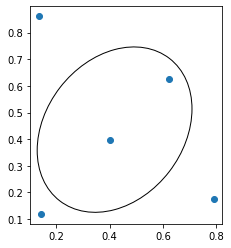

In [48]:
import numpy as np
size = 5
x = np.random.random((size,))
y = np.random.random((size,))
X = np.stack((x, y), axis=0)
cov = np.cov(X)
lambda_, v = np.linalg.eig(cov)

from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
ax = plt.subplot(111, aspect='equal')
nstd = 1
w, h = 2 * nstd * np.sqrt(lambda_)
ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=np.rad2deg(np.arccos(v[0, 0])), color='black')
ell.set_facecolor('none')
ax.add_artist(ell)
plt.scatter(x, y)
plt.show()
